<a href="https://colab.research.google.com/github/izumatthew/HHA507_Anovas/blob/main/Anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
import numpy as np 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import statsmodels.stats.multicomp as mc
from scipy import stats

In [ ]:
df = pd.read_csv('heart_failure.csv')

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
list (df)

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

Dependant variable: anaemia

Independant variables: age, smoking status, platelets, high blood pressure

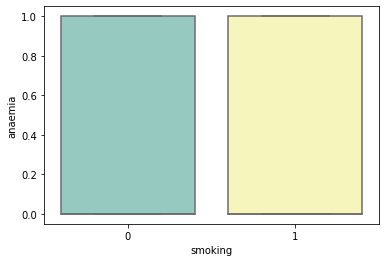

In [ ]:
df_smoking_status_boxplot = sns.boxplot(x='smoking', y= 'anaemia', data=df, palette="Set3")

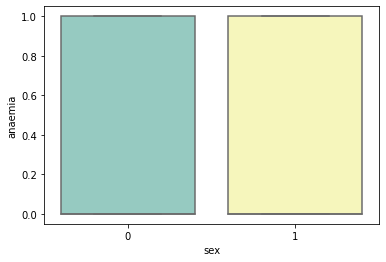

In [ ]:
df_gender_boxplot = sns.boxplot(x='sex', y= 'anaemia', data=df, palette="Set3")

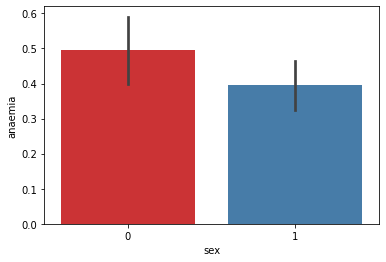

In [ ]:
df_vs_gender = sns.barplot(x='sex', y= 'anaemia', data=df, palette="Set1")

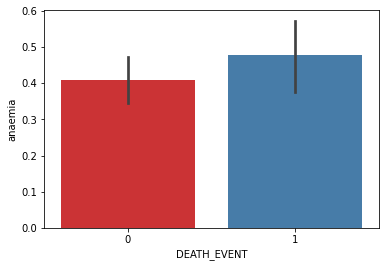

In [ ]:
df1_vs_heart_disease = sns.barplot(x='DEATH_EVENT', y= 'anaemia', data=df, palette="Set1")

In [ ]:
def rules(row):
  if row['platelets'] <= 150000 :
    return 'abnormal'
  elif row['platelets'] <= 250000:
    return 'normal'
  elif row ['platelets'] > 350000:
    return 'high'

In [ ]:
df['platelets_mod2'] = df.apply(rules, 1)

In [ ]:
df[['platelets', 'platelets_mod2']]

,platelets,platelets_mod2
0,265000.00,None
1,263358.03,None
2,162000.00,normal
3,210000.00,normal
4,327000.00,None
...,...,...
294,155000.00,normal
295,270000.00,None
296,742000.00,None
297,140000.00,abnormal


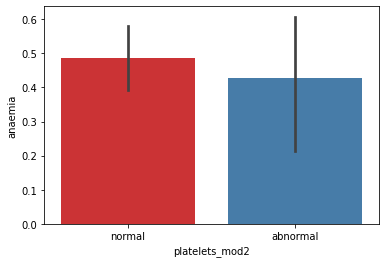

In [ ]:
df1_vs_smoking = sns.barplot(x='platelets_mod2', y= 'anaemia', data=df, palette="Set1")

In [ ]:
workingdf = df[['anaemia', 'sex','smoking','age', 'platelets_mod2']]
workingdf

,anaemia,sex,smoking,age,platelets_mod2
0,0,1,0,75.0,None
1,0,1,0,55.0,None
2,0,1,1,65.0,normal
3,1,1,0,50.0,normal
4,1,0,0,65.0,None
...,...,...,...,...,...
294,0,1,1,62.0,normal
295,0,0,0,55.0,None
296,0,0,0,45.0,None
297,0,1,1,45.0,abnormal


1 way A NOVA tests

Is there significance between the presence of getting anaemia and platelets count

In [ ]:
model = ols('anaemia ~ C(platelets)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(platelets),175.0,46.204482,0.264026,1.196579,0.144405
Residual,123.0,27.140000,0.220650,NaN,NaN


No significant difference

Is there a significance between the presence of getting anaemia and a persons smoking status

In [ ]:
model = ols('anaemia ~ C(smoking)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(smoking),1.0,0.844276,0.844276,3.458612,0.063912
Residual,297.0,72.500205,0.244108,NaN,NaN


Significant difference or result.

Is there a significance between the presence of a anaemia and the gender of a person

In [ ]:
model = ols('anaemia ~ C(sex)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(sex),1.0,0.658718,0.658718,2.691577,0.101939
Residual,297.0,72.685763,0.244733,NaN,NaN


Significant difference or result


**Post Comp Tests**

In [ ]:
import statsmodels.stats.multicomp as mc

In [ ]:
comp1 = mc.MultiComparison(df['anaemia'], df['sex'])
post_hoc_res = comp1.tukeyhsd() 
tukeyway1 = post_hoc_res.summary()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [ ]:
comp2 = mc.MultiComparison(df['anaemia'], df['smoking'])
post_hoc_res2 = comp2.tukeyhsd() 
tukeyway2 = post_hoc_res2.summary()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [ ]:
comp3 = mc.MultiComparison(df['anaemia'], df['platelets'])
post_hoc_res3 = comp3.tukeyhsd() 
tukeyway3 = post_hoc_res3.summary()